# 7. Машинное обучение в бизнесе
# Выбор локации для скважины

На основании данных геологоразведки трех регионов необходимо построить модель машинного обучения для предсказания объемов запасов нефти в новых скважинах и определения региона, где добыча принесет наибольшую прибыль.

1. [Загрузка и подготовка данных](#introduction) <br>
   1.1 [Импорт библиотек](#subparagraph1) <br>
   1.2 [Загрузка данных](#subparagraph2) <br>
   1.3 [Вывод информации о первом регионе](#subparagraph3) <br>
   1.4 [Вывод информации о втором регионе](#subparagraph4) <br>
   1.5 [Вывод информации о третьем регионе](#subparagraph5) <br>
   1.6 [Анализ распределения признаков в датасетах](#subparagraph6) <br>
   1.7 [Анализ корреляций](#subparagraph7) <br>
2. [Обучение и проверка модели](#paragraph2) <br>
3. [Подготовка к расчету прибыли](#paragraph3) <br>
4. [Расчет прибыли и рисков](#paragraph4) <br>
5. [Общий вывод](#paragraph5) <br>

## 1. Загрузка и подготовка данных
<a name="introduction"></a>

### 1.1 Импорт библиотек
<a name="subparagraph1"></a>

In [1]:
#импортируем необходимые библиотеки
import numpy as np
import pandas as pd
from scipy import stats as st 
import seaborn as sns


from IPython.display import display

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.style as style
from matplotlib.colors import ListedColormap

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, mean_absolute_error
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score, GridSearchCV

import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
from pandas_profiling import ProfileReport
!pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: pandas-profiling[notebook] in /home/jovyan/.local/lib/python3.7/site-packages (2.11.0)
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
Defaulting to user installation because normal site-packages is not writeable


### 1.2 Загрузка данных
<a name="subparagraph2"></a>

In [2]:
geo_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_2 = pd.read_csv('/datasets/geo_data_2.csv')

Согласно условию задачи каждый датасет включает в себя следующие признаки:<br>
id - уникальный идентификатор скважины; <br>
f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы); <br>
product — объём запасов в скважине (тыс. баррелей). <br>

In [3]:
#создадим функцию для вывода общей информации о датафрейме и количества дубликатов
def data_info(df):
    print ('Количество полных дубликатов в датасете:', sum(df.duplicated()))
    display(df.head())
    display(df.info())

### 1.3 Вывод информации о первом регионе
<a name="subparagraph3"></a>

In [4]:
data_info(geo_0)

Количество полных дубликатов в датасете: 0


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

### 1.4 Вывод информации о втором регионе
<a name="subparagraph4"></a>

In [5]:
data_info(geo_1)

Количество полных дубликатов в датасете: 0


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

### 1.5 Выведем информацию о третьем регионе
<a name="subparagraph5"></a>

In [6]:
data_info(geo_2)

Количество полных дубликатов в датасете: 0


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Результаты предварительного анализа данных: <br>
- Пропуски и дубликаты отсутствуют в данных  <br>
- Типы данных согласуются с их описанием: 1 качественный признак - идентификатор скважины, 4 признака - количественных  <br>
- Датафрейм содержит 5 признаков и 100 тыс. объектов <br>

## 1.6 Анализ распределения признаков в датасетах
<a name="subparagraph6"></a>

In [7]:
def display_hist(data, data_name, n_bins, rug=False):
    sns.set()
    f, axes = plt.subplots(1, 2, figsize = (18, 4))
    axes[0].set_title("Плотность распределения признака " + data_name, fontsize=16)
    sns.distplot(data, bins = n_bins, rug=rug, ax = axes[0])
    axes[1].set_title("Диаграмма размаха признака " + data_name, fontsize=16)
    sns.boxplot(data=data, ax = axes[1])
    plt.show()

In [8]:
def region(data, name):
    features = ['f0', 'f1', 'f2', 'product']
    for column in features: 
        display_hist(data[column], column + ' ' + name, n_bins=20)

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



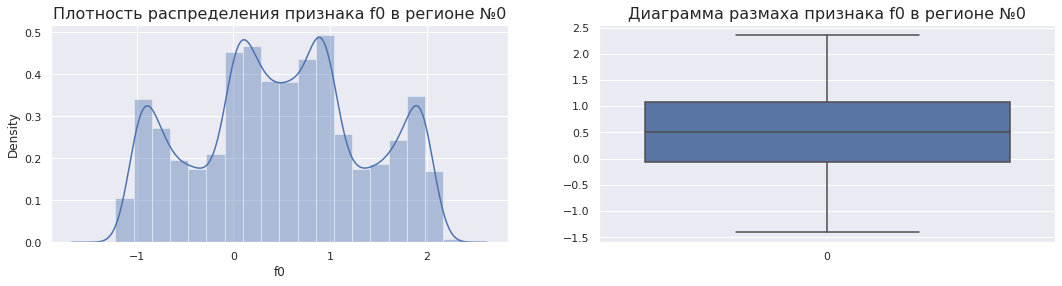

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



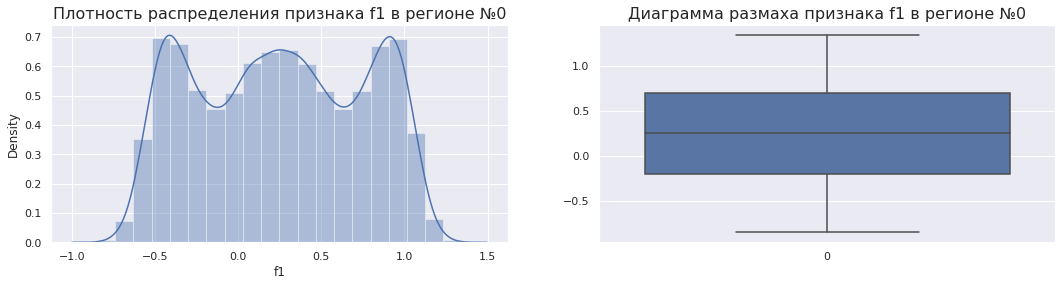

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



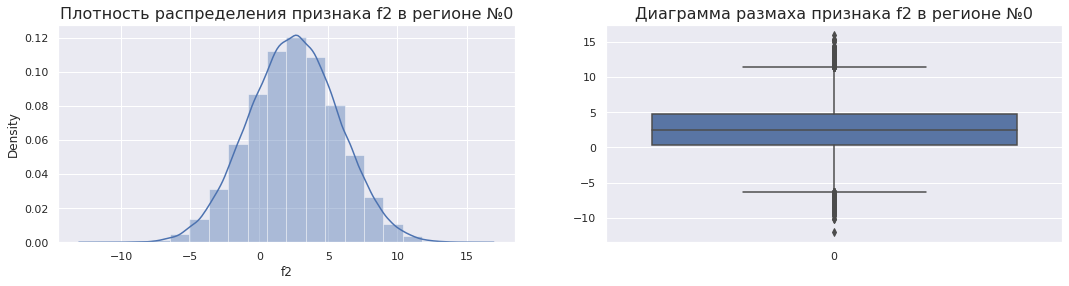

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



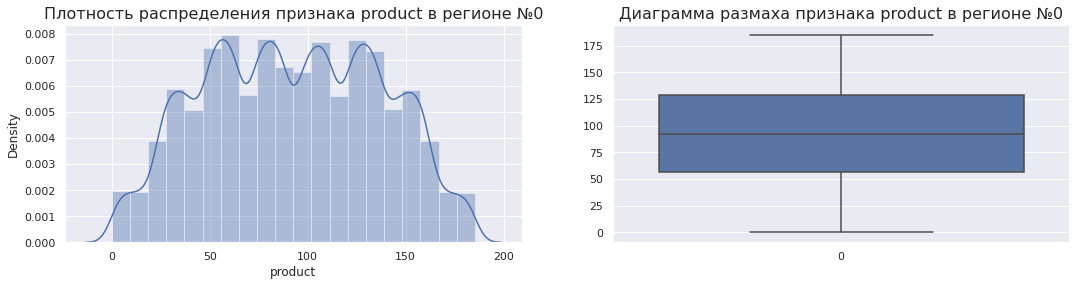

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



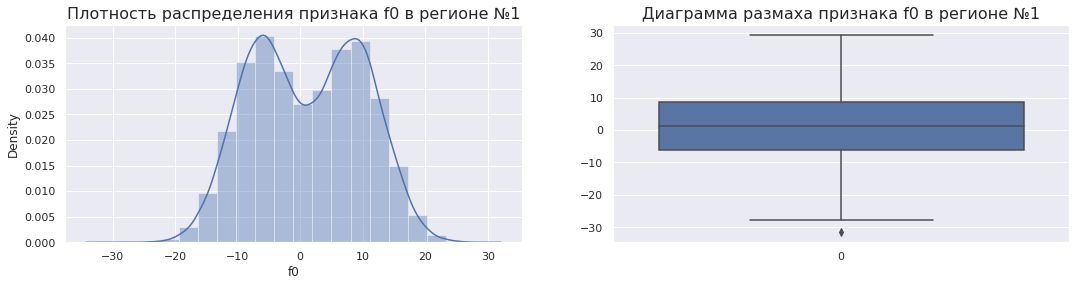

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



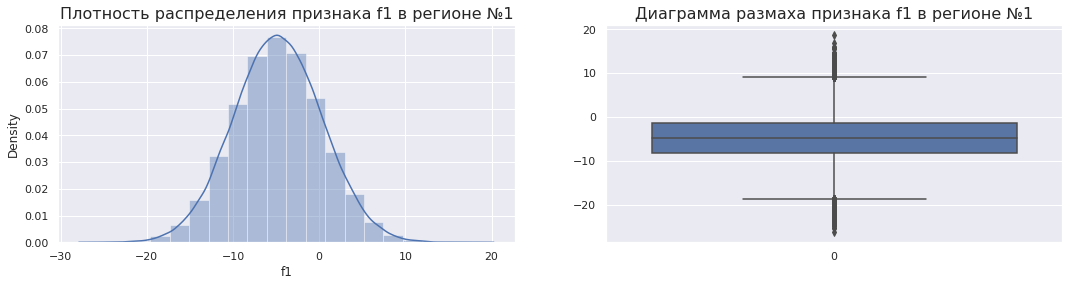

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



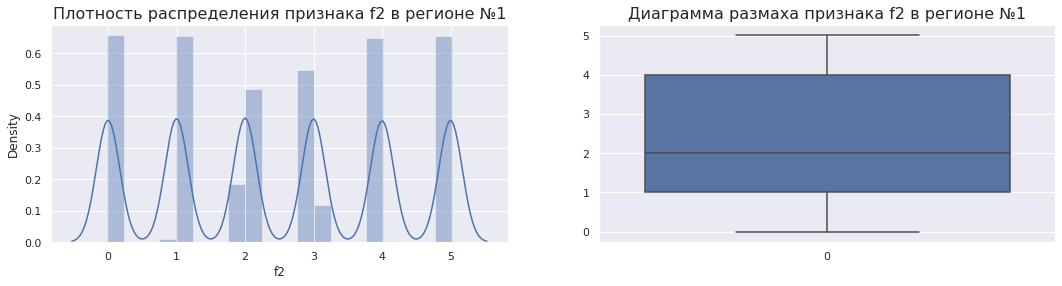

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



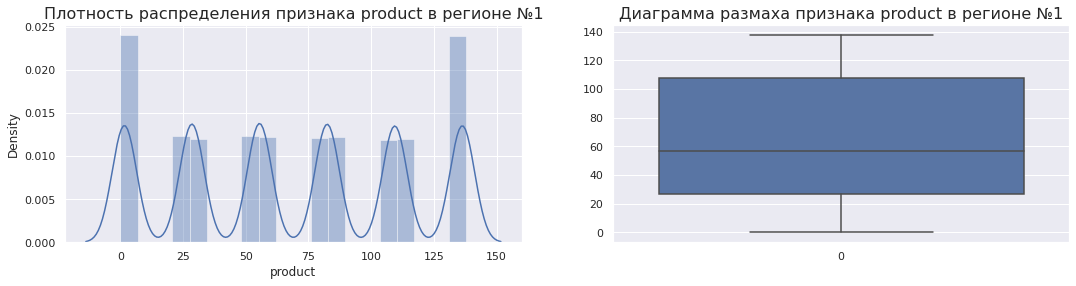

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



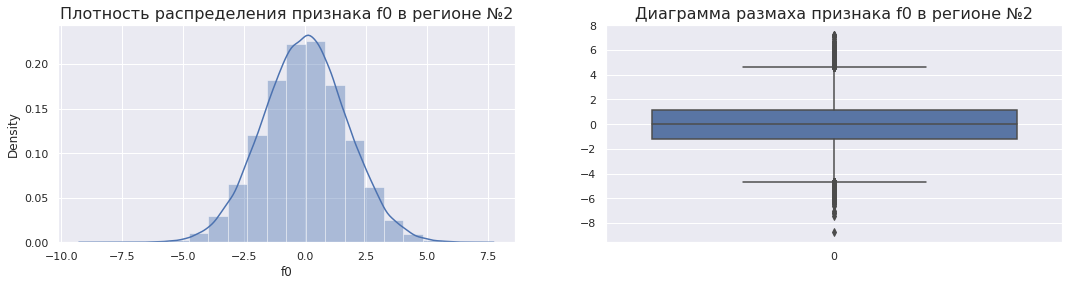

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



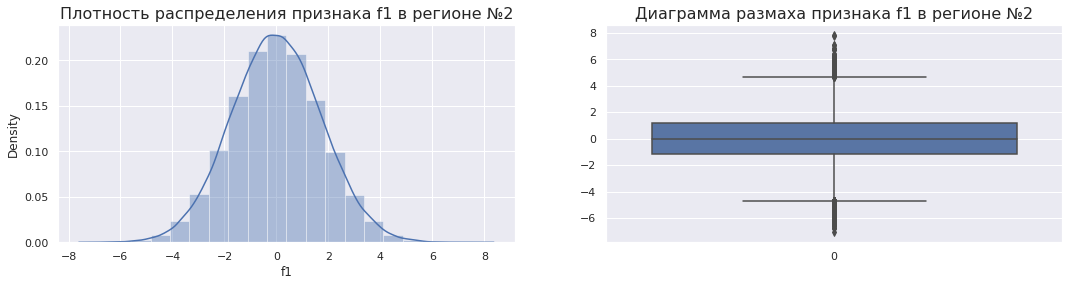

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



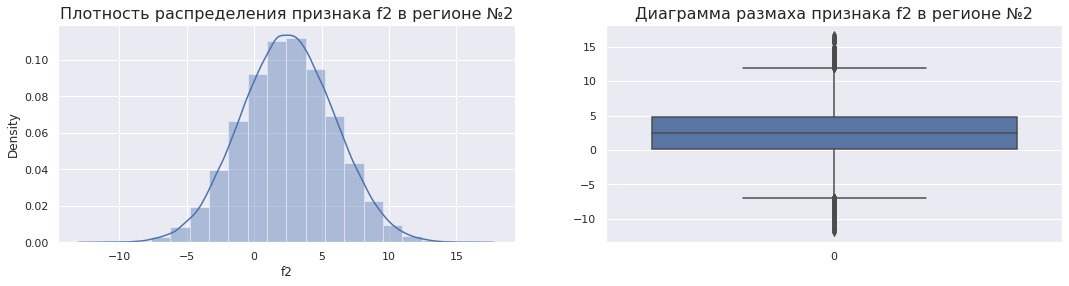

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



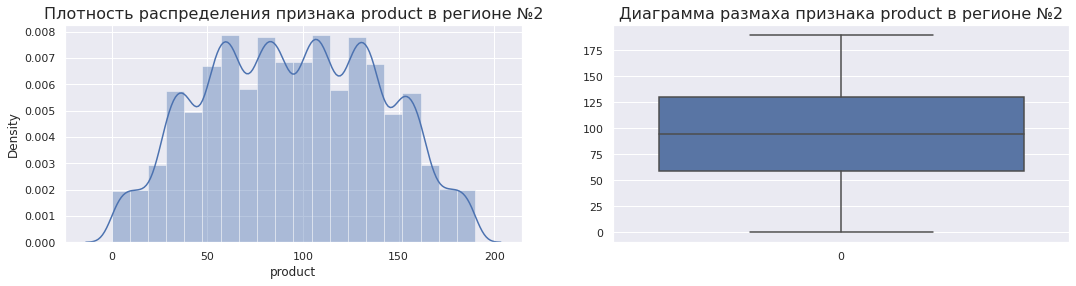

In [9]:
for data, name in [(geo_0, 'в регионе №0'), (geo_1, 'в регионе №1'), (geo_2, 'в регионе №2')]:
    region(data, name)

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



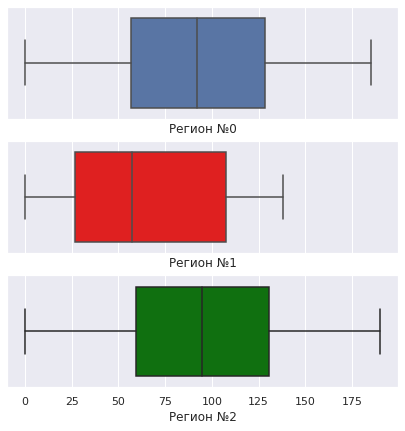

In [10]:
#отобразим распределение нефти в каждом регионе
fig, axes = plt.subplots(3,1, sharex = True, figsize = (7,7))
sns.boxplot(geo_0['product'], ax=axes[0])
sns.boxplot(geo_1['product'], ax=axes[1], color='red')
sns.boxplot(geo_2['product'], ax=axes[2], color = 'green')

axes[0].set_xlabel('Регион №0')
axes[1].set_xlabel('Регион №1')
axes[2].set_xlabel('Регион №2')

plt.show()

Обнаруженные особенности в данных:<br>
- часть признаков распределена ненормально, наблюдаются выбросы и несколько мод в распределениях <br>
- масштаб признаков не различается значительно, следовательно, можно не применять процедуру масштабирования <br>
- регионы по показателю среднего объема запасов нефти располагаются в следующем порядке убывания: регион №2, регион №0, регион №1 <br>


### 1.7 Анализ корреляций
<a name="subparagraph7"></a>

<AxesSubplot:>

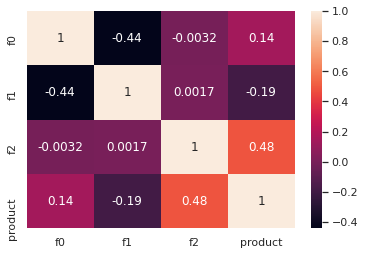

In [11]:
#построим тепловую матрицу корреляций для региона №0
sns.heatmap(geo_0.corr(), annot = True)

<AxesSubplot:>

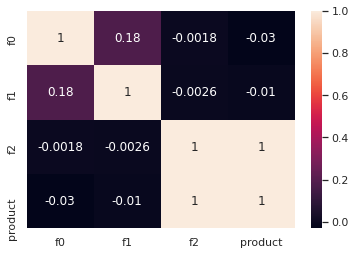

In [12]:
#построим тепловую матрицу корреляций для региона №1
sns.heatmap(geo_1.corr(), annot = True)

<AxesSubplot:>

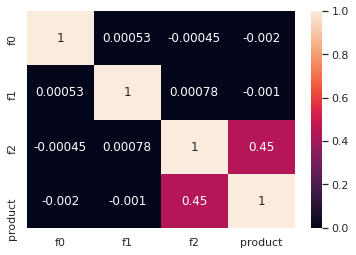

In [13]:
#построим тепловую матрицу корреляций для региона №1
sns.heatmap(geo_2.corr(), annot = True)

В первом регионе наблюдается тесная положительная корреляция между признаком f2 и объемом запасов нефти. В других регионах данная корреляция также наблюдается, но она не столь тесная (коэффициент корреляции 0,45-0,48).

## 2. Обучение и проверка модели
<a name="paragraph2"></a>

- разделим данные на обучающую и валидационную выборки 
- обучим модель линейной регрессии и сделаем предсказания на валидационной выборке
- рассчитаем MSE, RMSE, R2


In [14]:
#создадим список из датасетов
datasets_list = {'регион №0': geo_0, 'регион №1' : geo_1, 'регион №2' : geo_2}

In [15]:
#напишем функцию для предсказания среднего запаса сырья в каждом регионе
from numpy import sqrt
state = np.random.RandomState(12345)


results = []

for key, data in datasets_list.items():
    target = data['product']
    features = data.drop(['id', 'product'], axis=1)
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, train_size = 0.75, test_size = 0.25, random_state = state)
  
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    
    mean = predictions.mean()
    MSE = mean_squared_error(target_valid, predictions)
    RMSE = sqrt(MSE)
    R2 = r2_score(target_valid, predictions)
    
    results.append({'Region': key, 'features_train' : features_train, 'features_valid' : features_valid, 'target_train' : target_train, 'target_valid' : target_valid, 'predictions' : pd.Series(predictions, index = target_valid.index), 'mean' : mean, 'MSE' : MSE, 'RMSE' : RMSE, 'R2' : R2})
   
    
    print(key+':')
    print('features_train:', features_train.shape) 
    print('features_valid:', features_valid.shape)
    print('target_valid:', target_valid.shape)
    print('predictions:', predictions.shape)

регион №0:
features_train: (75000, 3)
features_valid: (25000, 3)
target_valid: (25000,)
predictions: (25000,)
регион №1:
features_train: (75000, 3)
features_valid: (25000, 3)
target_valid: (25000,)
predictions: (25000,)
регион №2:
features_train: (75000, 3)
features_valid: (25000, 3)
target_valid: (25000,)
predictions: (25000,)


In [16]:
#выведем результаты на экран
columns = ['Region', 'mean', 'MSE', 'RMSE', 'R2']
pred_results = pd.DataFrame(results)[columns]
display(pred_results)

,Region,mean,MSE,RMSE,R2
0,регион №0,92.592568,1412.212936,37.579422,0.279943
1,регион №1,68.769951,0.791632,0.889737,0.999626
2,регион №2,95.087528,1596.645157,39.958042,0.202615


Выводы: <br>

1. Наименьшие значения метрик MSE, RMSE и максимальное значение R2 наблюдается во втором регионе - т.е. предсказания для данного региона характеризуются наибольшей точностью. Предсказания для нулевого и первого регионов гораздо менее точные. <br>

2. Средние значения запасов нефти, предсказанные по валидационной выборке, близки к фактическому объему нефтяных запасов в регионах. Максимальное значение наблюдается во втором регионе - 95,1 тыс. баррелей  <br>

## 3. Подготовка к расчёту прибыли
<a name="paragraph3"></a>

Произведем расчет достаточного объема сырья для безубыточной разработки новой скважины и сравним полученный объем со средним запасом в каждом регионе. <br>

Минимальный безубыточный объем сырья можно рассчитать как: <br>
суммарный бюджет на разработку скважин в регионе/(cредний доход с одной скважины в регионе * кол-во выбранных для бурения скважин) <br>

In [17]:
#сохраним в переменных ключевые значения для расчетов 
total_drills = 500 #общее кол-во исследуемых скважин
best_drills = 200 #кол-во лучших месторождений для разработки
total_budget = 10**10 #бюджет на разработку скважин в регионе
profit_per_barrel = 450*10**3

In [18]:
#рассчитаем минимальный безубыточный объем продукта
min_product = total_budget/(profit_per_barrel*best_drills)
print('Минимальный объем сырья для безубыточной разработки новой скважины составляет: {:.2f}'.format(min_product))

Минимальный объем сырья для безубыточной разработки новой скважины составляет: 111.11


In [19]:
mean_values = pd.DataFrame({'Region':['Регион №0', 'Регион №1', 'Регион №2'], 'Predicted_mean' : [pred_results['mean'][0], pred_results['mean'][1], pred_results['mean'][2]], 'Real_mean' : [geo_0['product'].mean(), geo_1['product'].mean(), geo_2['product'].mean()]})
display(mean_values)

,Region,Predicted_mean,Real_mean
0,Регион №0,92.592568,92.500
1,Регион №1,68.769951,68.825
2,Регион №2,95.087528,95.000


На основании таблицы можно заключить, что минимальный объем сырья для безубыточной разработки превышает объем как реальных средних, так и предсказанных средних значений запасов в каждом регионе.

**Вывод** <br>


Минимальный безубыточный объем сырья превышает на 20% средний объем сырья в нулевом регионе, на 61,4% - в первом регионе, на 17% - во втором регионе. Мы не можем выбирать скважины наугад, поскольку, несмотря на то, что во всех регионах средний запас нефти ниже, вероятность попадания в зону убытков различная в каждом регионе, т.к. распределение запасов нефти, и, следовательно, потенциальной прибыли, в каждом регионе различается.

## 4. Расчёт прибыли и рисков 
<a name="paragraph4"></a>

Напишем функцию для расчета прибыли по выбранным скважинам и предсказаниям модели: <br>
- выберем скважины с максимальными значениями предсказаний; <br>
- просуммируем целевое значение объема сырья, соответствующее этим предсказаниям; <br>
- рассчитаем прибыль для полученного объема сырья. <br>

In [20]:
def profit(target, pred, num):
    best_pred = pred.sort_values(ascending = False).head(num).index
    revenue = target[best_pred].sum()*profit_per_barrel
    gross_profit = revenue - total_budget
    return gross_profit

In [21]:
def profit_1(target, probabilities, num):
    prob = probabilities.sort_values(ascending = False)
    best_target = target[prob.index][:num]
    profit = profit_per_barrel * best_target.sum() - total_budget
    return profit

С помощью техники Bootstrap сгенерируем 1000 выборок и найдем распределение прибыли. Найдем 95%-й доверительный интервал и риск убытков.

In [26]:
bp_results = []

for index, name in enumerate(results):
    target_valid = name.get('target_valid')
    predictions = pd.Series(name.get('predictions'), index=target_valid.index)
    
    values = []
    
    for i in range(1000):
        
        target_subsample = target_valid.sample(n=total_drills, replace=True, random_state=state)
        predict_subsample = predictions[target_subsample.index]
        
        values.append(profit_1(target_subsample, predict_subsample, best_drills))
        
    values = pd.Series(values)
    
    mean = values.mean() / 10000000
    lower = values.quantile(0.025) / 10000000
    upper = values.quantile(0.975) /  10000000
    confidence_interval = (lower, upper)
    std = values.std() /  10000000
    loss_prob = (values < 0).sum() / values.count() *100
    
    bp_results.append({'Region': pd.DataFrame(results)['Region'][index], 
                              'values': values,
                              'lower': lower, 
                              'upper': upper,
                              'std': std,
                              'loss_probability': loss_prob,
                              'mean': mean, 
                              'confidence_interval': confidence_interval})

In [28]:
best_pred = predict_subsample.sort_values(ascending = False).head(200).index
target_subsample[best_pred].shape

(206,)

In [32]:
prob = predict_subsample.sort_values(ascending = False)
target[prob.index][:200].shape


(200,)

In [30]:
test_results = pd.DataFrame(bp_results)
bp_columns = ['Region', 'lower', 'upper', 'std', 'loss_probability', 'mean', 'confidence_interval']
display(test_results[bp_columns])

,Region,lower,upper,std,loss_probability,mean,confidence_interval
0,регион №0,-12.022432,98.255486,27.716758,6.2,42.506386,"(-12.022431621770023, 98.25548633446738)"
1,регион №1,11.712164,96.000246,21.595483,0.5,51.633142,"(11.71216359447295, 96.00024599272113)"
2,регион №2,-16.196386,92.950973,27.581346,9.7,36.460199,"(-16.19638606931357, 92.95097313283826)"


Вывод: <br>
Среди всех регионов наиболее высокий показатель средней прибыли в первом регионе - 65,8 млрд руб. При этом в первом регионе также самая низкая вероятность получения убытков - 1%. В нулевом и третьем регионах вероятность получения убытков  выше - 2,5% и 4.3% соответственно, при этом мы должны ориентироваться на регионы, где вероятность убытков меньше 2,5%. Следовательно, третий регион мы не можем рассматривать в качестве одной из альтернатив.

## 5. Общий вывод
<a name="paragraph5"></a>

1. При построении прогнозов запасов нефти с использованием модели линейной регрессии было выявлено, что наиболее высокое качество модели и точность предсказаний (т.е. наиболее низкие RMSE, MSE и высокий R2) наблюдаются на данных о месторождениях первого региона. <br> 
2. Максимальное предсказанное среднее значение объемов сырья во втором регионе - 95,1 тыс. баррелей, однако точность этого прогноза низкая (у данного региона максимальный RMSE - 0,4). <br>
3. После применения процедуры bootstrap было выявлено, что максимальная оценка средней прибыли в первом регионе - 65,9 млрд руб. При этом в данном регионе наиболее низкая вероятность убытков - 1% (ниже допустимого порога в 2,5%). 
